# Zain Ali

## Research question/interests
- ** What are the differences in the trends of inflation in more Captilatist economies as compared to mixed economies?**
- Since the data set used consists for much more thhan 30 years, and consists data for numerous different countries, I wish to see what the difference in inflation trends has been between Capitalist and mixed economies, and if there is a significant difference in the two.
- **  Does a high or low CPI indicate whether a country is developing or developed**
- With data from numerous countries, I wish to analyse and understand the trend of CPI and its effect on a countries stance on development.

In [ ]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pylab as plt
df = pd.read_csv('./../data/raw/Inflationdataset.csv')
print(df)

         LOCATION INDICATOR       SUBJECT  MEASURE FREQUENCY    TIME  \
0             AUS       CPI          ENRG   AGRWTH         A    1972   
1             AUS       CPI          ENRG   AGRWTH         A    1973   
2             AUS       CPI          ENRG   AGRWTH         A    1974   
3             AUS       CPI          ENRG   AGRWTH         A    1975   
4             AUS       CPI          ENRG   AGRWTH         A    1976   
...           ...       ...           ...      ...       ...     ...   
293465  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Aug-22   
293466  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Sep-22   
293467  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Oct-22   
293468  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Nov-22   
293469  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Dec-22   

             Value Flag Codes  
0         4.910070        NaN  
1         3.762801        NaN  
2        13.173540        NaN  
3      

In [ ]:
df.columns
# to understand the columns we have, alongside the values in the columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [ ]:
df.nunique(axis=0)
#helps to understand which columns will help most for comparisons

LOCATION          52
INDICATOR          1
SUBJECT            4
MEASURE            2
FREQUENCY          3
TIME            1745
Value         246286
Flag Codes         1
dtype: int64

In [ ]:
#indicator, measure, and frequency look like they will not be needed for my current analysis
df_cleaned = df.copy().drop(['INDICATOR','MEASURE','FREQUENCY'], axis=1)

In [ ]:
#from the initial, I can see tha time is more spread out for the recent years, I wish to change that
df_cleaned=df.copy()
df_cleaned=df_cleaned.drop(df_cleaned.index[6075:293470])
#spread out time starts from the 6075 reading onwards, so we should remove that
df_cleaned = df_cleaned.drop(['Flag Codes'],axis=1)
#flag codes has only NaN values
print(df_cleaned)

     LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME      Value
0         AUS       CPI    ENRG  AGRWTH         A  1972   4.910070
1         AUS       CPI    ENRG  AGRWTH         A  1973   3.762801
2         AUS       CPI    ENRG  AGRWTH         A  1974  13.173540
3         AUS       CPI    ENRG  AGRWTH         A  1975  19.422470
4         AUS       CPI    ENRG  AGRWTH         A  1976   8.833195
...       ...       ...     ...     ...       ...   ...        ...
6070     OECD       CPI     TOT  AGRWTH         A  2017   2.281483
6071     OECD       CPI     TOT  AGRWTH         A  2018   2.607160
6072     OECD       CPI     TOT  AGRWTH         A  2019   2.068702
6073     OECD       CPI     TOT  AGRWTH         A  2020   1.370630
6074     OECD       CPI     TOT  AGRWTH         A  2021   3.992894

[6075 rows x 7 columns]


In [ ]:
#sub data frames for Canada and Turkey
df_F = df_cleaned.loc[df_cleaned['SUBJECT']=="FOOD"]
df_F.reset_index()
df_energy = df_cleaned.loc[df_cleaned['SUBJECT'] == "ENRG"]
df_energy.reset_index()
df_CAN_E = df_energy.loc[df_cleaned['LOCATION']=="CAN"]
df_TUR_E= df_energy.loc[df_cleaned['LOCATION']=="TUR"]
df_CAN_E.reset_index()
df_TUR_E.reset_index()
df_CAN_F = df_F.loc[df_cleaned['LOCATION']=="CAN"]
df_TUR_F = df_F.loc[df_cleaned['LOCATION']=="TUR"]
df_CAN_F.reset_index()
df_TUR_F.reset_index()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,4546,TUR,CPI,FOOD,AGRWTH,A,1963,6.892642
1,4547,TUR,CPI,FOOD,AGRWTH,A,1964,-0.247280
2,4548,TUR,CPI,FOOD,AGRWTH,A,1965,5.850273
3,4549,TUR,CPI,FOOD,AGRWTH,A,1966,8.992974
4,4550,TUR,CPI,FOOD,AGRWTH,A,1967,15.169750
5,4551,TUR,CPI,FOOD,AGRWTH,A,1968,5.217247
6,4552,TUR,CPI,FOOD,AGRWTH,A,1969,1.694031
7,4553,TUR,CPI,FOOD,AGRWTH,A,1970,3.706493
8,4554,TUR,CPI,FOOD,AGRWTH,A,1971,13.225970
9,4555,TUR,CPI,FOOD,AGRWTH,A,1972,13.191520


<AxesSubplot:xlabel='TIME', ylabel='Value'>

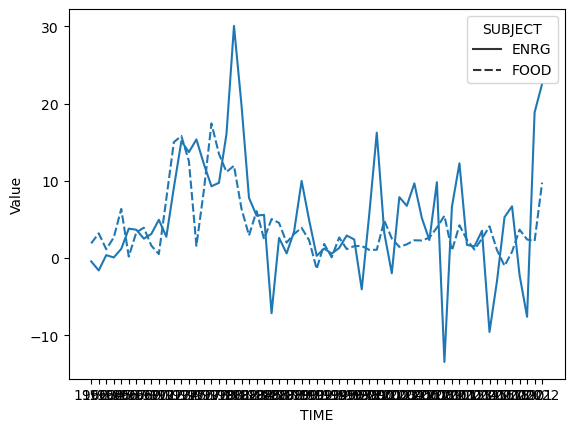

In [ ]:
df_CAN_PRICES= pd.concat([df_CAN_E, df_CAN_F], ignore_index=True)
sns.lineplot(data = df_CAN_PRICES, x=df_CAN_PRICES['TIME'], y=df_CAN_PRICES['Value'], style = "SUBJECT") 

<AxesSubplot:xlabel='TIME', ylabel='Value'>

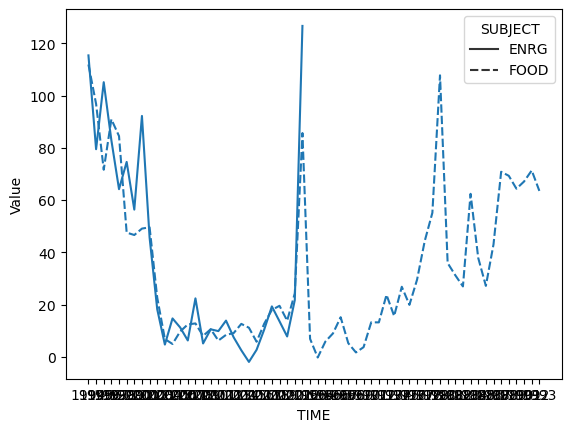

In [ ]:
df_TUR_PRICES= pd.concat([df_TUR_E, df_TUR_F], ignore_index=True)
sns.lineplot(data = df_TUR_PRICES, x=df_TUR_PRICES['TIME'], y=df_TUR_PRICES['Value'], style = "SUBJECT")

<AxesSubplot:xlabel='TIME', ylabel='Value'>

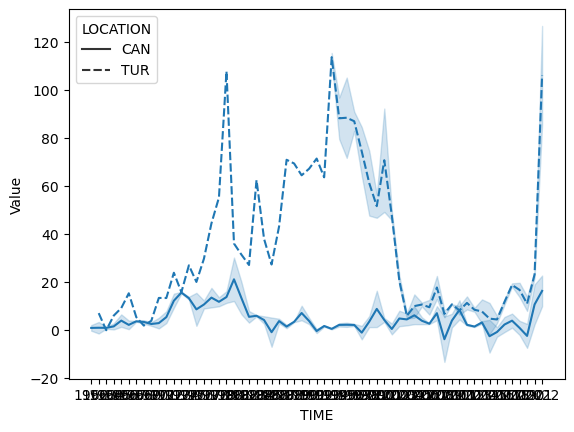

In [ ]:
dfTUR_CAN= pd.concat([df_CAN_PRICES, df_TUR_PRICES], ignore_index=True)
sns.lineplot(data = dfTUR_CAN, x=dfTUR_CAN['TIME'], y=dfTUR_CAN['Value'], style = "LOCATION") 

With the graphs above I am able to identify that there is a positive correlation between prices of energy and prices of food for both Canada and Turkiye, however, both countries have a varying correlation with each other of their changes in price levels for food and energy. The third graph shows that the trend between the two countris positive for 2 thirds of the graph, with a negative corellation in between.

## Revised questions:
- ** What are the differences in energy prices for developing and developed countries? Is there a correlation between the two?
- This data focuses quite a bit on energy levels. I wouls like to us that and identify trends between different countries and their energy levels, and see how strong the correllation/s are, if there are any.
- ** Do developing countries always have higher energy costs? Does a developed country benefit in price level if they provide other ocuntries with energy?
- The first part of this question is achieveable through this data set, as there are enough data sets to compare countries and their price levels and find a consistency. The second question would require a few articles which indicate deals made between countries for energy, however, I feel it will be vital to achieving a conclusion.
## Analysis Plan:
After making the few plots I have, I have realised that the values when plotted are too unstable when achieving a long run trend. So I must cut down on the number of years of data used, or focus on periodic trends, in order to answer my questions.